<a href="https://colab.research.google.com/github/dhanu417/cookbook-data/blob/master/ad_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/Drive')
%cd /content/Drive/My Drive/HackerEarth/Dataset

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive
/content/Drive/My Drive/HackerEarth/Dataset


In [2]:
pwd

'/content/Drive/My Drive/HackerEarth/Dataset'

In [0]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [74]:
df = pd.read_csv('Train.csv')
print(df.shape)
df.head()

(26048, 12)


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [0]:
df.columns = df.columns.str.strip()
#df.columns = [x.strip() for x in df.columns]

In [31]:
df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [76]:
df['realtionship_status'].value_counts()

Married-civ-spouse       11844
Never-married             8547
Divorced                  3649
Widowed                    818
Separated                  793
Married-spouse-absent      378
Married-AF-spouse           19
Name: realtionship_status, dtype: int64

In [77]:
df.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object

In [78]:
df.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [79]:
print(df['netgain'].value_counts())
print(df['targeted_sex'].value_counts())
print(df['industry'].value_counts())
print(df['genre'].value_counts())

False    19853
True      6195
Name: netgain, dtype: int64
Male      17245
Female     8803
Name: targeted_sex, dtype: int64
Pharma           10339
Auto              6801
Political         4014
Entertainment     2765
Other             1333
ClassAction        796
Name: industry, dtype: int64
Comedy         22258
Infomercial     2516
Drama            803
Direct           247
Other            224
Name: genre, dtype: int64


In [80]:
df1 = df.copy()
df1.head()
df1.shape

(26048, 12)

In [81]:
df = pd.get_dummies(data=df, columns=['realtionship_status', 'industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee'])
df.head()

,id,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_Auto,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Comedy,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime,airlocation_Cambodia,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,19717,45,0.027465,False,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,31593,45,0.027465,False,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,5681,45,0.027465,False,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,15491,40,0.027465,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,23587,48,0.027465,True,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [82]:
df.shape

(26048, 74)

In [49]:
(df.nunique()/df.shape[0])*100

id                                   100.000000
average_runtime(minutes_per_week)      0.349355
ratings                                0.479883
netgain                                0.007678
realtionship_status_Divorced           0.007678
                                        ...    
expensive_High                         0.007678
expensive_Low                          0.007678
expensive_Medium                       0.007678
money_back_guarantee_No                0.007678
money_back_guarantee_Yes               0.007678
Length: 74, dtype: float64

In [50]:
df.isnull().sum()

id                                   0
average_runtime(minutes_per_week)    0
ratings                              0
netgain                              0
realtionship_status_Divorced         0
                                    ..
expensive_High                       0
expensive_Low                        0
expensive_Medium                     0
money_back_guarantee_No              0
money_back_guarantee_Yes             0
Length: 74, dtype: int64

In [51]:
df['industry'].value_counts().plot(kind = "bar")

KeyError: ignored

In [0]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']

In [0]:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [0]:
for col in categorical_columns:

    print ('\nFrequency of Categories for varible %s'%col)

    print (df[col].value_counts())

In [86]:
miss_bool = df['netgain'].isnull()
print(miss_bool.value_counts())


False    26048
Name: netgain, dtype: int64


In [87]:
print ('Orignal #missing: %d'% sum(miss_bool))

Orignal #missing: 0


In [0]:
df = df.drop(['id'],axis=1)

In [89]:
df.head()
df.shape

(26048, 73)

In [0]:
"""from sklearn.preprocessing import LabelEncoder

var_mod = ['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee']

le = LabelEncoder()

for i in var_mod:

    df[i] = le.fit_transform(df[i])"""

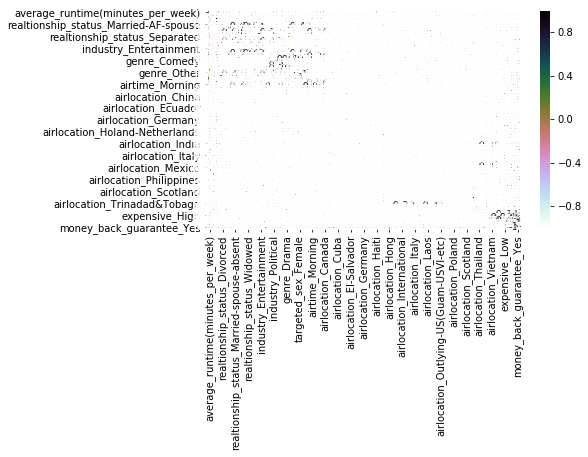

In [59]:
plt.figure(figsize=(7,4))

sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())

plt.show()

In [0]:
"""Feature = df[['realtionship_status','industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee']]
Feature.head()
Feature.shape"""

(26048, 10)

In [90]:
df.head()

,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_Auto,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Comedy,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime,airlocation_Cambodia,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,45,0.027465,False,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,45,0.027465,False,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,45,0.027465,False,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,40,0.027465,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,48,0.027465,True,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [91]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["net_gain"] = lb_make.fit_transform(df["netgain"])
df[["netgain", "net_gain"]].head(11)

,netgain,net_gain
0,False,0
1,False,0
2,False,0
3,False,0
4,True,1
5,False,0
6,False,0
7,False,0
8,False,0
9,False,0


In [92]:
print(df['net_gain'].value_counts())
print(df['netgain'].value_counts())

0    19853
1     6195
Name: net_gain, dtype: int64
False    19853
True      6195
Name: netgain, dtype: int64


In [0]:
df.drop(['netgain'],axis =1,inplace = True)


In [0]:
df.rename({'net_gain': 'netgain'}, axis=1, inplace=True)

In [108]:
df.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_Auto,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Comedy,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime,airlocation_Cambodia,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes,netgain
0,45,0.027465,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,45,0.027465,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,45,0.027465,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,40,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,48,0.027465,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [105]:
df2 =df.copy()
df2.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_Auto,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Comedy,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime,airlocation_Cambodia,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes,netgain
0,45,0.027465,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,45,0.027465,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,45,0.027465,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,40,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,48,0.027465,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
df['ratings'] = scaler.fit_transform(df2['ratings'].values.reshape(-1,1))
df['average_runtime(minutes_per_week)'] = scaler.fit_transform(df['average_runtime(minutes_per_week)'].values.reshape(-1,1))

In [127]:
df.shape

(26048, 73)

In [128]:
X = df.iloc[:,0:72]  #independent columns
y = df.iloc[:,-1]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (26048, 72)
Shape of y: (26048,)


In [144]:
X = np.array(df.iloc[:, df.columns != 'netgain'])
y = np.array(df.iloc[:, df.columns == 'netgain'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (26048, 72)
Shape of y: (26048, 1)


In [145]:
#X = Feature
X[0:5]


array([[ 0.37709809, -0.14832981,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0. 

In [146]:
#y = df['netgain'].values
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [0]:
"""
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]"""

array([[ 0.25947348, -1.46583377, -0.39862412,  0.71446959,  0.37709809,
         0.75148564,  0.30051083, -0.14832981, -1.37593686, -1.00376939],
       [-0.4004333 ,  0.66275193, -0.39862412,  0.71446959,  0.37709809,
         0.75148564,  0.30051083, -0.14832981,  0.26473164, -1.00376939],
       [-1.72024687, -0.40154092, -0.39862412, -1.39963969,  0.37709809,
         0.75148564,  0.30051083, -0.14832981, -1.37593686,  0.99624477],
       [ 1.57928705,  1.19489835,  2.62653689, -1.39963969, -0.02356805,
         0.75148564,  0.30051083, -0.14832981,  0.26473164, -1.00376939],
       [-0.4004333 ,  0.66275193, -0.39862412,  0.71446959,  0.61749777,
         0.75148564,  0.30051083, -0.14832981, -1.37593686, -1.00376939]])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [0]:

seed=50
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=seed)

In [149]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train.ravel())
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7592130518234165
2 :  0.7933781190019193
3 :  0.7869481765834933
4 :  0.7906909788867562
5 :  0.7923224568138196
6 :  0.7946257197696737
7 :  0.7959692898272552
8 :  0.8004798464491363
9 :  0.8005758157389635
10 :  0.8001919385796545
11 :  0.7976967370441459


KeyboardInterrupt: ignored

In [0]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

12  :  79.92 %


Text(0, 0.5, 'Train Accuracy')

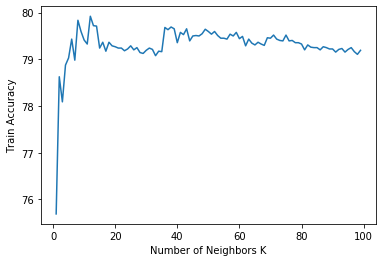

In [0]:
plt.plot(range(1,100),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [0]:
knn=KNeighborsClassifier(n_neighbors=12,weights='uniform')
knn.fit(X_train,y_train)
pred_KNN=knn.predict(X_test)
accuracy=metrics.accuracy_score(pred_KNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  79.9 %


In [0]:

from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,pred_KNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_KNN)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_KNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(X_train))*100,'%')

              precision    recall  f1-score   support

       False       0.83      0.93      0.88      7935
        True       0.63      0.38      0.47      2485

    accuracy                           0.80     10420
   macro avg       0.73      0.65      0.67     10420
weighted avg       0.78      0.80      0.78     10420



Jaccard Similarity Score :  79.92 %


F1-SCORE :  [0.87602228 0.47251639]




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Train Accuracy:  81.39237266444843 %


In [0]:
  from sklearn.linear_model import LogisticRegression
 # from sklearn.cross_validation import KFold   #For K-fold cross validation
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.tree import DecisionTreeClassifier, export_graphviz
  from sklearn import metrics
  from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [151]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


In [152]:
best_clf.best_params_

{'classifier': LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 1.623776739188721,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [0]:
#logistic regression
lr = LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)
lr.fit(X_train, y_train.ravel())
lr_pred = lr.predict(X_test)

In [159]:
lr = LogisticRegression()
lr.fit(X_train,y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_pred = lr.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,lr_pred))

Accuracy for Random Forest on CV data:  0.8031669865642994


In [0]:
#random forest

In [0]:
rfc1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=8, max_features=6,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

rfc1.fit(X_train, y_train)

pred=rfc1.predict(X_test)


In [0]:
rfc=RandomForestClassifier(random_state=42)

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [164]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.ravel()) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [165]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

rfc1.fit(X_train, y_train.ravel())

pred=rfc1.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test.ravel(),pred))

Accuracy for Random Forest on CV data:  0.8071976967370441


In [0]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [174]:
#Lightgbm

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train.ravel(),
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.851404	valid_0's l1: 0.350204	valid_0's binary_logloss: 0.516889
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.852176	valid_0's l1: 0.339239	valid_0's binary_logloss: 0.492651
[3]	valid_0's auc: 0.854869	valid_0's l1: 0.329362	valid_0's binary_logloss: 0.473291
[4]	valid_0's auc: 0.855637	valid_0's l1: 0.320579	valid_0's binary_logloss: 0.457582
[5]	valid_0's auc: 0.856539	valid_0's l1: 0.312589	valid_0's binary_logloss: 0.444583
[6]	valid_0's auc: 0.856752	valid_0's l1: 0.305438	valid_0's binary_logloss: 0.43373
[7]	valid_0's auc: 0.856772	valid_0's l1: 0.29899	valid_0's binary_logloss: 0.42451
[8]	valid_0's auc: 0.856856	valid_0's l1: 0.293117	valid_0's binary_logloss: 0.416702
[9]	valid_0's auc: 0.857196	valid_0's l1: 0.287835	valid_0's binary_logloss: 0.410008
[10]	valid_0's auc: 0.857187	valid_0's l1: 0.283139	valid_0's binary_logloss: 0.404447
[11]	valid_0's auc: 0.857734	valid_0's l1: 0.278759	valid_0's binary_logloss: 0.3

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.125, max_depth=-1,
                                      metric='l1', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=20,
                                      n_jobs=-1, num_leaves=38, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.125, 0.15, 0.17

In [175]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.125, 'n_estimators': 30}


In [177]:
gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 30)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.859382	valid_0's l1: 0.346687	valid_0's binary_logloss: 0.508285
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.859321	valid_0's l1: 0.333316	valid_0's binary_logloss: 0.480162
[3]	valid_0's auc: 0.859363	valid_0's l1: 0.321698	valid_0's binary_logloss: 0.458865
[4]	valid_0's auc: 0.86071	valid_0's l1: 0.311299	valid_0's binary_logloss: 0.441616
[5]	valid_0's auc: 0.86032	valid_0's l1: 0.302439	valid_0's binary_logloss: 0.428292
[6]	valid_0's auc: 0.859667	valid_0's l1: 0.29472	valid_0's binary_logloss: 0.417659
[7]	valid_0's auc: 0.860212	valid_0's l1: 0.287947	valid_0's binary_logloss: 0.408955
[8]	valid_0's auc: 0.861215	valid_0's l1: 0.281815	valid_0's binary_logloss: 0.401428
[9]	valid_0's auc: 0.861706	valid_0's l1: 0.276196	valid_0's binary_logloss: 0.394852
[10]	valid_0's auc: 0.861599	valid_0's l1: 0.271487	valid_0's binary_logloss: 0.389794
[11]	valid_0's auc: 0.862425	valid_0's l1: 0.267204	valid_0's binary_logloss: 0.3

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.125, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=30, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

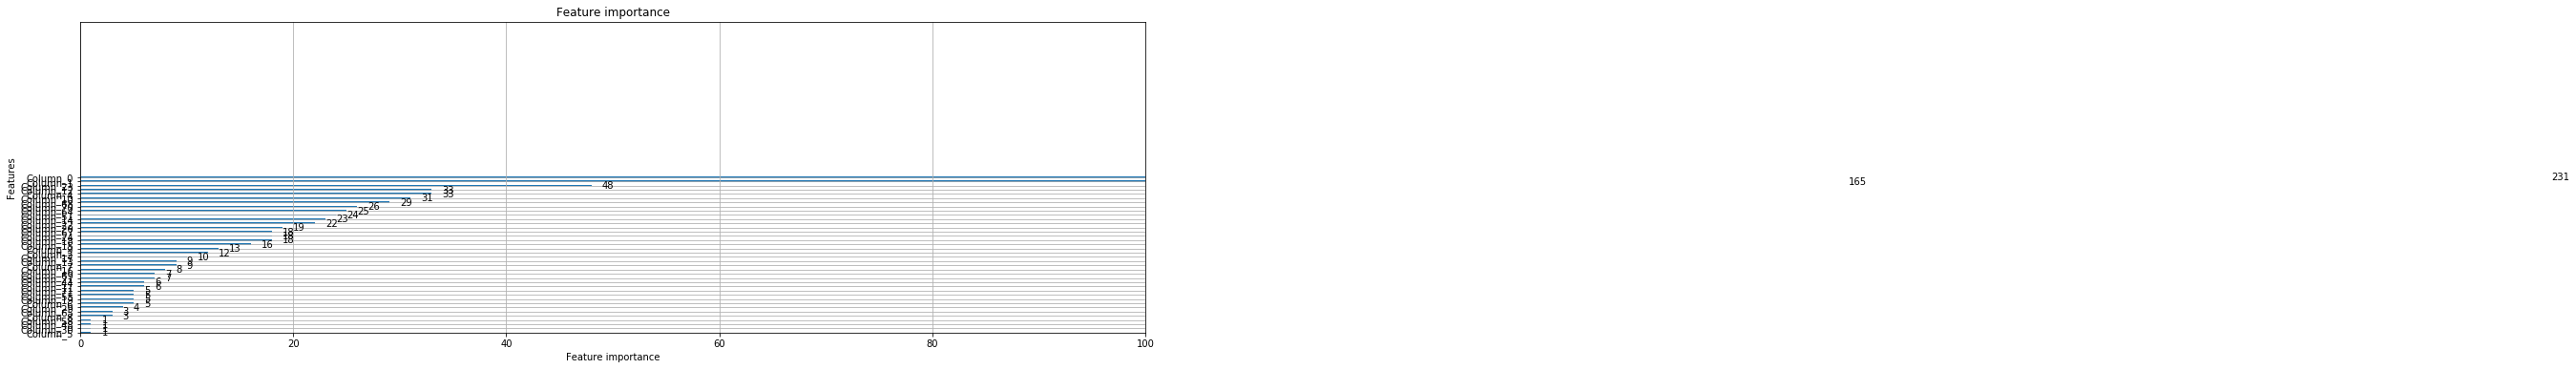

In [182]:

ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 75, 
                         xlim = (0,100), ylim = (0,74), 
                         figsize = (20,6))
plt.show()

In [179]:
# For each feature of our dataset, the result of the following
# code snippet contains numbers of times a feature is used in a model.
sorted(gbm.feature_importances_,reverse=True)

[231,
 165,
 48,
 33,
 33,
 31,
 29,
 26,
 25,
 24,
 23,
 22,
 19,
 18,
 18,
 18,
 16,
 13,
 12,
 10,
 9,
 9,
 8,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [180]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.8185220729366602
The roc_auc_score of prediction is: 0.6899966909205707
The null acccuracy is: 0.7615163147792706


In [0]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

In [184]:
y_pred_prob

array([0.01085909, 0.07877774, 0.06673603, ..., 0.05826062, 0.41144296,
       0.40789997])

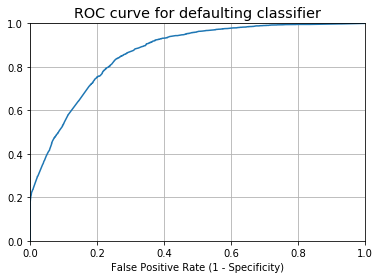

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [186]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[7425  510]
 [1381 1104]]


In [187]:
# Create a Decision Tree model

from xgboost import XGBClassifier

mod = XGBClassifier(random_state=0)
mod.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [188]:
# Predict the results

from sklearn.metrics import confusion_matrix, accuracy_score

pred_train = mod.predict(X_train)
pred_test = mod.predict(X_test)

# Check the accuracy
print("Training accuracy : ", accuracy_score(y_train, pred_train))
print("Testing accuracy : ", accuracy_score(y_test, pred_test))

Training accuracy :  0.8224340926542104
Testing accuracy :  0.8172744721689059


In [0]:
# Let's prevent overfitting by using cross-validation
from sklearn.model_selection import cross_val_score, KFold



In [0]:
# Using GridSearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Set the hyperparameter values
parameters = [{'learning_rate':[0.01,0.05,0.1,0.2, 0.3, 0.5, 1.0],
              'max_depth':[3,4,5,6,10],
              'min_child_weight':[1,2,3]}]
    
mod = XGBClassifier()

grid_search = GridSearchCV(estimator=mod,
                           param_grid=parameters, 
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the training data for the models
grid_search = grid_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print ("Best accuracy : ", grid_search.best_score_)
print ("\n\nBest parameters : ", grid_search.best_params_)

Best accuracy :  0.8186588175070386


Best parameters :  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2}


In [0]:
pred_y = grid_search.predict(X_test)

print ('Confusion Matrix : \n', confusion_matrix(y_test,pred_y))
print ('\n Test set accuracy : ', accuracy_score(y_test, pred_y))

Confusion Matrix : 
 [[7402  533]
 [1368 1117]]

 Test set accuracy :  0.8175623800383878


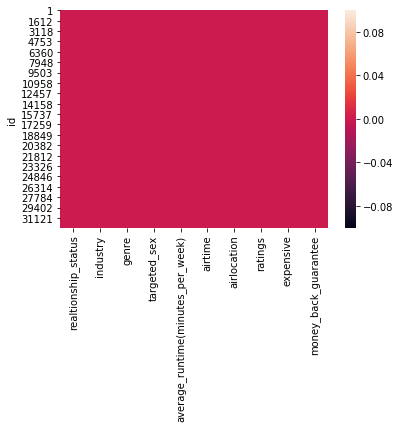

In [0]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


# In[140]:


test_df = pd.read_csv('Test.csv',index_col='id')
#test_df.head()
test_df.shape


# In[141]:


test_df.head()


# In[142]:


sns.heatmap(test_df.isnull())


# In[143]:


# test_df.isnull().sum()
# test_df = test_df.drop(['id'],axis=1)
# test_df.head()


# In[144]:


from sklearn.preprocessing import LabelEncoder

var_mod = ['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee']

le = LabelEncoder()

for i in var_mod:

    test_df[i] = le.fit_transform(test_df[i])

test_df.head()


# In[145]:


test_feature = test_df[['realtionship_status','industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee']]
test_feature.head()


# In[146]:


test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)

In [0]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
#accuracy=metrics.accuracy_score(predKNN_test,y_t)
#print("accuracy : ",round(accuracy,3)*100,'%')


# In[152]:


prediction = pd.DataFrame({'id':test_df.index,'netgain':predKNN_test}).to_csv('Submission.csv',index=False)


# In[137]:


predKNN_test


In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

rfc1.fit(X,y)

pred_rf=rfc1.predict(test_data)


# In[306]:


pred_rf


# In[307]:


prediction = pd.DataFrame({'id':test_df.index,'netgain':pred_rf}).to_csv('Submission_rf1.csv',index=False)

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.175, metric = 'l1', 
                        n_estimators = 24)


gbm.fit(X, y)
pred_lgbm = gbm.predict(test_data)

In [0]:
pred_lgbm

array([False, False, False, ..., False, False, False])

In [0]:
prediction_lgbm = pd.DataFrame({'id':test_df.index,'netgain':pred_lgbm}).to_csv('Submission_lgbm.csv',index=False)

In [0]:
#XGBoosting
xgb = XGBClassifier( learning_rate = 0.1, max_depth= 4, min_child_weight = 2)
xgb.fit(X,y)
pred_xgb = xgb.predict(test_data)

In [0]:
pred_xgb

array([False, False, False, ..., False, False, False])

In [0]:
prediction_xgb = pd.DataFrame({'id':test_df.index,'netgain':pred_lgbm}).to_csv('Submission_xgb.csv',index=False)

In [0]:
"""#Cat_boosting
import datetime
from datetime import datetime
import catboost as cat
from catboost import CatBoostClassifier
start= datetime.now()
end= datetime.now()

date_diff= end-start
print('time diff', date_diff)

model = CatBoostClassifier(iterations=50, eval_metric='AUC')


# fit the model with the training data
model.fit(X_train,y_train,plot=True,eval_set=(X_test,y_test) )

# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
print('roc_score on train dataset : ', roc_auc_score(y_train,predict_train))
print('Report on train dataset : ','\n', classification_report(y_train,predict_train))

# predict the target on the test dataset
predict_test = model.predict(X_test)

print('*'*30)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)
print('roc_score on test dataset : ', roc_auc_score(y_test,predict_test))
print('Report on test dataset : ','\n', classification_report(y_test,predict_test))
end= datetime.now()

date_diff= end-start
print('time diff', date_diff)"""

Learning rate set to 0.375363


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8351718	best: 0.8351718 (0)	total: 69.3ms	remaining: 3.4s
1:	test: 0.8442292	best: 0.8442292 (1)	total: 78.2ms	remaining: 1.88s
2:	test: 0.8455667	best: 0.8455667 (2)	total: 87.1ms	remaining: 1.36s
3:	test: 0.8493194	best: 0.8493194 (3)	total: 96.4ms	remaining: 1.11s
4:	test: 0.8524086	best: 0.8524086 (4)	total: 105ms	remaining: 947ms
5:	test: 0.8546368	best: 0.8546368 (5)	total: 113ms	remaining: 826ms
6:	test: 0.8554568	best: 0.8554568 (6)	total: 117ms	remaining: 721ms
7:	test: 0.8560582	best: 0.8560582 (7)	total: 122ms	remaining: 640ms
8:	test: 0.8571855	best: 0.8571855 (8)	total: 127ms	remaining: 577ms
9:	test: 0.8577368	best: 0.8577368 (9)	total: 131ms	remaining: 526ms
10:	test: 0.8585793	best: 0.8585793 (10)	total: 136ms	remaining: 482ms
11:	test: 0.8596047	best: 0.8596047 (11)	total: 140ms	remaining: 445ms
12:	test: 0.8603415	best: 0.8603415 (12)	total: 145ms	remaining: 413ms
13:	test: 0.8601886	best: 0.8603415 (12)	total: 150ms	remaining: 385ms
14:	test: 0.8603966	bes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:182: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


UFuncTypeError: ignored

In [0]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

NameError: ignored

In [0]:
#!pip install datetime
!pip install catboost

     |████████████████████████████████| 63.9MB 61kB/s 
